Learning Objectives
- Be able to describe what a Coordinate Reference System (CRS) is.
- Be able to list the steps associated with plotting 2 datasets stored using different coordinate reference systems.

## Intro to Coordinate Reference Systems

### Geographic vs. Projected CRS

- Geographic coordinate systems: coordinate systems that span the entire globe (e.g. latitude / longitude).


- Projected coordinate Systems: coordinate systems that are localized to minimize visual distortion in a particular region (e.g. Robinson, UTM, State Plane)

### What is a Coordinate Reference System
To define the location of something you often use a coordinate system. This system consists of an X and a Y value located within a 2 (or more) -dimensional space.

A CRS defines the translation between a location on the round earth and that same location, on a flattened, 2 dimensional coordinate system. 

A coordinate reference system (CRS) is a coordinate-based local, regional or global system used to locate geographical entities. – Wikipedia

## The Components of a CRS
The coordinate reference system is made up of several key components:

- **Coordinate System:** the X, Y grid upon which your data is overlayed and how you define where a point is located in space.
- **Horizontal and vertical units:** The units used to define the grid along the x, y (and z) axis.
- **Datum:** A modeled version of the shape of the earth which defines the origin used to place the coordinate system in space. You will explain this further, below.
- **Projection Information:** the mathematical equation used to flatten objects that are on a round surface (e.g. the earth) so you can view them on a flat surface (e.g. your computer screens or a paper map).

#### Coordinate System & Units
You can define a spatial location, such as a plot location, using an x- and a y-value - similar to your cartesian coordinate system displayed in the figure, above.

For example, the map below shows all of the continents in the world, in a Geographic Coordinate Reference System. The units are Degrees and the coordinate system itself is latitude and longitude with the origin being the location where the equator meets the central meridian on the globe (0,0).

Next, you will learn more about CRS by exploring some data. 

In [2]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et 

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")


In [3]:
worldBound = gpd.read_file('C:/capes_sql/colorado-flood/spatial-vector-lidar/global/ne_110m_land/ne_110m_land.shp')

In [5]:
worldBound.head()

,featurecla,scalerank,geometry
0,Country,1,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Country,1,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,Country,1,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Country,1,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Country,1,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."


### Plot the Data

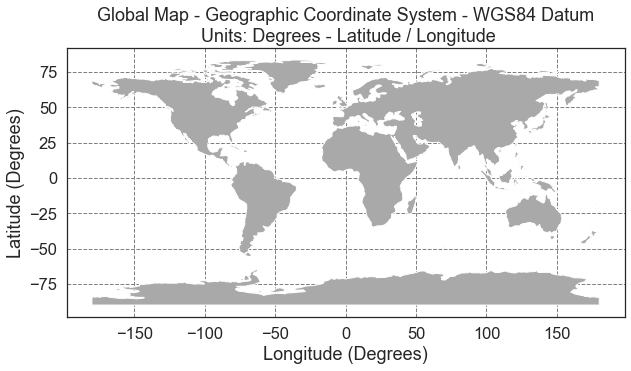

In [4]:
# Plot worldBound data using geopandas
fig, ax = plt.subplots(figsize=(10, 5))
worldBound.plot(color='darkgrey', 
                ax=ax)

# Set the x and y axis labels
ax.set(xlabel="Longitude (Degrees)",
       ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")

# Add the x y graticules
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', 
              linestyle='dashed')
ax.xaxis.grid(color='gray', 
              linestyle='dashed')

### Create Spatial Points Object
Next, add three coordinate locations to your map. Note that the UNITS are in decimal degrees (latitude, longitude):

- Boulder, Colorado: 40.0274, -105.2519
- Oslo, Norway: 59.9500, 10.7500
- Mallorca, PPCC: 39.6167, 2.9833

To plot these points spatially you will

- create a numpy array of the point locations and
- Use a for loop to populate a shapely Point object

In [10]:
# Create numpy array of x,y point locations
add_points = np.array([[-105.2519,   40.0274], 
                       [  10.75  ,   59.95  ], 
                       [   2.9833,   39.6167]])

# Turn points into list of x,y shapely points 
city_locations = [Point(xy) for xy in add_points]# for loop to populate a shapely Point object
city_locations

# Create geodataframe using the points list

In [11]:
# Create geodataframe using the points
city_locations = gpd.GeoDataFrame(city_locations, 
                                  columns=['geometry'],
                                  crs=worldBound.crs)# agafa el crs de worldBound
city_locations.head(3)

,geometry
0,POINT (-105.25190 40.02740)
1,POINT (10.75000 59.95000)
2,POINT (2.98330 39.61670)


### Plot the data


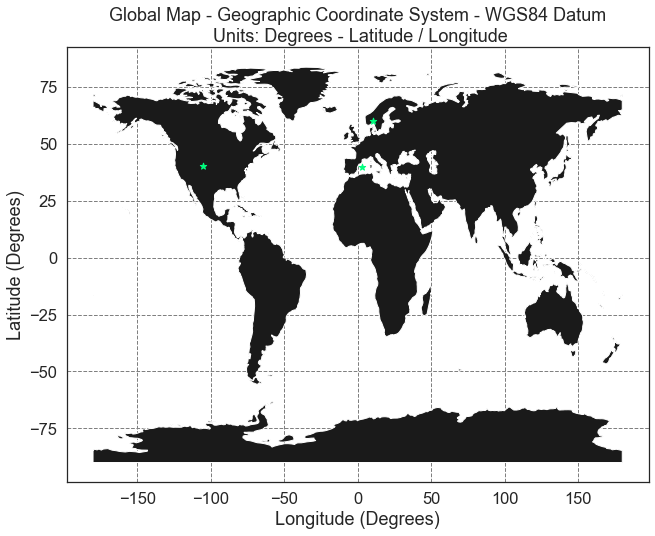

In [12]:
# Plot point locations
fig, ax = plt.subplots(figsize=(12, 8))

worldBound.plot(figsize=(10, 5), color='k',
               ax=ax)
# Add city locations
city_locations.plot(ax=ax, 
                    color='springgreen', 
                    marker='*',
                    markersize=45)

# Setup x y axes with labels and add graticules
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

Next, import proper graticules that can be projected into a particular coordinate reference system.

In [13]:
graticule = gpd.read_file('C:/capes_sql/colorado-flood/spatial-vector-lidar/global/ne_110m_graticules_all/ne_110m_graticules_15.shp')

In [15]:
bbox = gpd.read_file('C:/capes_sql/colorado-flood/spatial-vector-lidar/global/ne_110m_graticules_all/ne_110m_wgs84_bounding_box.shp')

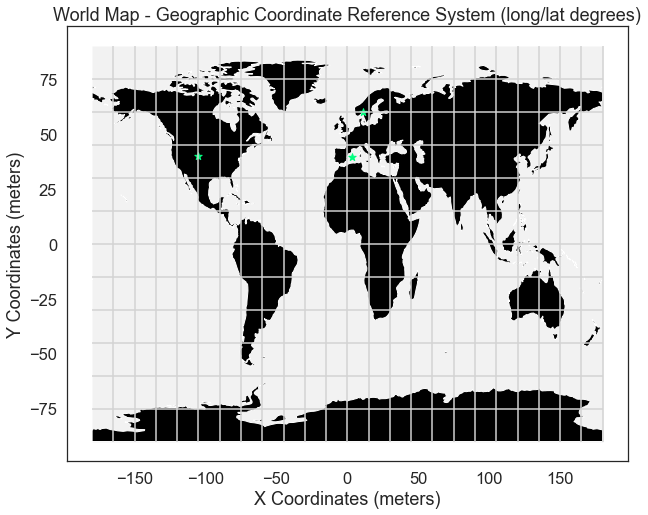

In [16]:
# Create map axis object
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Add bounding box and graticule layers
bbox.plot(ax=ax, alpha=.1, color='grey')
graticule.plot(ax=ax, color='lightgrey')
worldBound.plot(ax=ax, color='black')

# Add points to plot 
city_locations.plot(ax=ax, 
                    markersize=60, 
                    color='springgreen',
                    marker='*')
# Add title and axes labels
ax.set(title="World Map - Geographic Coordinate Reference System (long/lat degrees)",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)");

## Geographic CRS - The Good & The Less Good
Geographic coordinate systems in decimal degrees are helpful when you need to locate places on the Earth. However, latitude and longitude locations are not located using uniform measurement units. Thus, geographic CRSs are not ideal for measuring distance. This is why other projected CRS have been developed.

## Projected CRS - Robinson
You can view the same data above, in another CRS - Robinson. **Robinson is a projected CRS**. Notice that the country boundaries on the map - have a different shape compared to the map that you created above in the CRS: Geographic lat/long WGS84.

Below you first reproject your data into the robinson projects (+proj=robin). Then you plot the data once again.

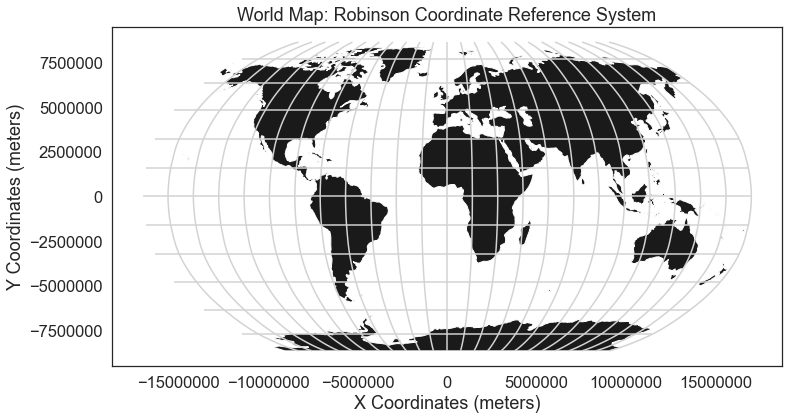

In [18]:
# Reproject the data
worldBound_robin = worldBound.to_crs('+proj=robin')
graticule_robin = graticule.to_crs('+proj=robin')

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

worldBound_robin.plot(ax=ax,
                      color='k')

graticule_robin.plot(ax=ax, color='lightgrey')

ax.set(title="World Map: Robinson Coordinate Reference System",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)  

What happens if you add the same Lat / Long coordinate locations that you used above, to your map? Remember that the data on your map are in the CRS - Robinson

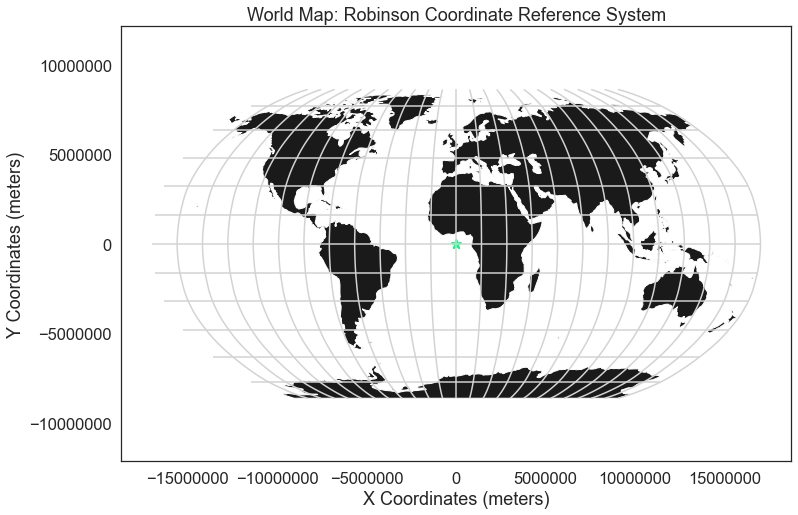

In [19]:
# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

worldBound_robin.plot(ax=ax,
                      color='k')
graticule_robin.plot(ax=ax, 
                     color='lightgrey')
city_locations.plot(ax=ax, 
                    marker='*', 
                    color='springgreen', 
                    markersize=100)

ax.set(title="World Map: Robinson Coordinate Reference System", 
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)
    
plt.axis('equal'); 

Notice above that when you try to add lat/long coordinates in degrees, to a map in a different CRS, the points are not in the correct location. You need to first convert the points to the same CRS that your other data are in. The process of converting a dataset from one CRS to another is often referred to as reprojection.

In python, you use the **.to_crs** method to reproject your data.

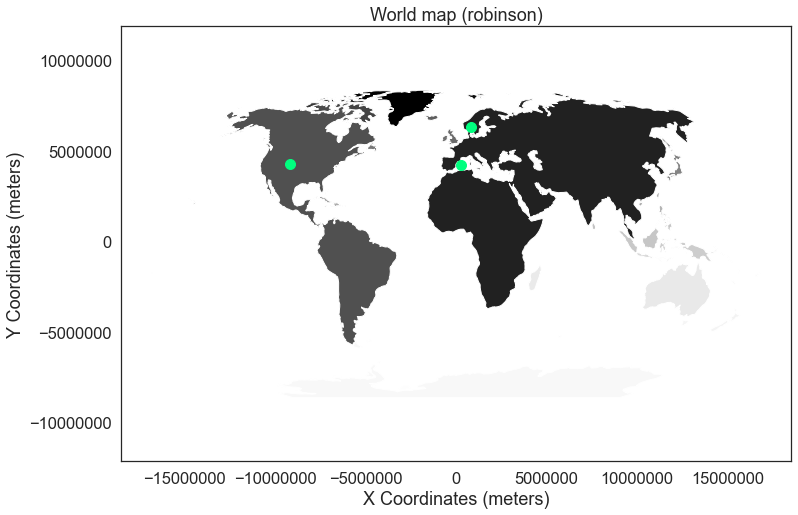

In [20]:
# Reproject point locations to the Robinson projection
city_locations_robin = city_locations.to_crs(worldBound_robin.crs)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
worldBound_robin.plot(ax=ax, 
                      cmap='Greys')
ax.set(title="World map (robinson)", 
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")
city_locations_robin.plot(ax=ax, markersize=100, color='springgreen')

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

plt.axis('equal');

#### Compare Maps
Both of the plots above look visually different and also use a different coordinate system. Look at both, side by side, with the actual **graticules** or latitude and longitude lines rendered on the map.

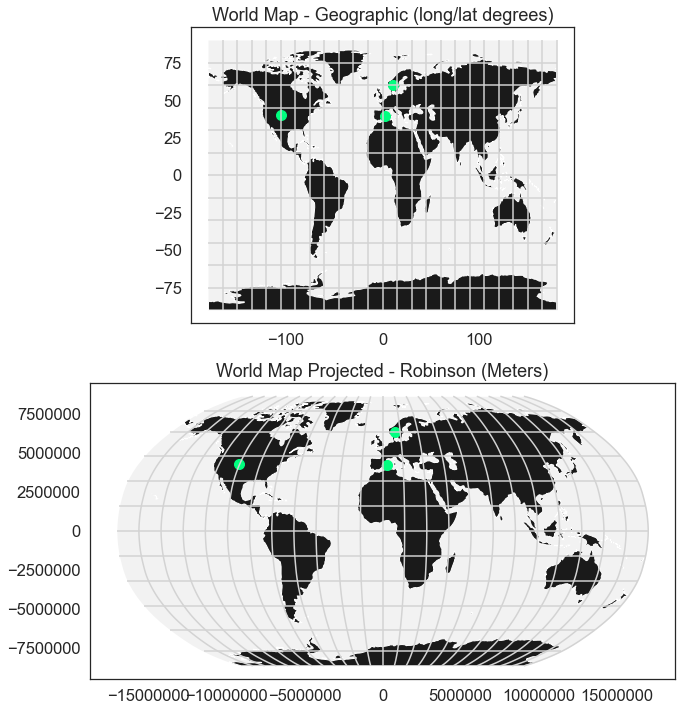

In [21]:
# Reproject graticules and bounding box  to robinson
graticule_robinson = graticule.to_crs('+proj=robin')
bbox_robinson = bbox.to_crs('+proj=robin')

# Setup plot with 2 "rows" one for each map and one column
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(13, 12))

# First plot
bbox.plot(ax=ax0,
          alpha=.1,
          color='grey')

graticule.plot(ax=ax0,
               color='lightgrey')

worldBound.plot(ax=ax0,
                color='k')

city_locations.plot(ax=ax0,
                    markersize=100,
                    color='springgreen')

ax0.set(title="World Map - Geographic (long/lat degrees)")

# Second plot
bbox_robinson.plot(ax=ax1,
                   alpha=.1,
                   color='grey')

graticule_robinson.plot(ax=ax1,
                        color='lightgrey')

worldBound_robin.plot(ax=ax1,
                      color='k')

city_locations_robin.plot(ax=ax1,
                          markersize=100,
                          color='springgreen')

ax1.set(title="World Map Projected - Robinson (Meters)")

for axis in [ax1.xaxis, ax1.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

## Why Multiple CRS?
You may be wondering, why bother with different CRSs if it makes your analysis more complicated? Well, each CRS is optimized to best represent the:

- shape and/or
- scale / distance and/or
- area

of features in the data. And no one CRS is great at optimizing all three elements: shape, distance AND area. Some CRSs are optimized for shape, some are optimized for distance and some are optimized for area. Some CRSs are also optimized for particular regions - for instance the United States, or Europe. Discussing CRS as it optimizes shape, distance and area is beyond the scope of this tutorial, but it’s important to understand that the CRS that you chose for your data, will impact working with the data.